# BLOOD DONATION ANALYSIS

ABOUT THE PROJECT

AIM OF PROJECT

TO BUILD A MODEL THAT WILL EFFECTIVELY IDENTIFY WHO IS ELIGIBLE TO DONATE BLOOD AGAIN

SOME OF THE MODELS TO BE IMPLEMENTED ARE LOGISTIC REGRESSION, SUPPORT VECTOR MACHINE, RANDOM FOREST, DECISION TREE, MLP CLASSIFIER

In [1]:
#EDA libraries
import pandas as pd
import numpy as np

#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#import ML Libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score

#import all models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

In [2]:
import warnings
warnings.simplefilter('ignore') #ignore unnecessary warnings

In [3]:
#set to print all columns
pd.set_option('display.max_columns', None)

In [4]:
#read and check the data
train = pd.read_csv('blood-train.csv')
test = pd.read_csv('blood-test.csv')

In [5]:
#print first 10 rows
train.head(10)

Unnamed: 0  Months since Last Donation  Number of Donations  \
0         619                           2                   50   
1         664                           0                   13   
2         441                           1                   16   
3         160                           2                   20   
4         358                           1                   24   
5         335                           4                    4   
6          47                           2                    7   
7         164                           1                   12   
8         736                           5                   46   
9         436                           0                    3   

   Total Volume Donated (c.c.)  Months since First Donation  \
0                        12500                           98   
1                         3250                           28   
2                         4000                           35   
3                         5000                           45   
4                         6000                           77   
5                         1000                            4   
6                         1750                           14   
7                         3000                           35   
8                        11500                           98   
9                          750                            4   

   Made Donation in March 2007  
0                            1  
1                            1  
2                            1  
3                            1  
4                            0  
5                            0  
6                            1  
7                            0  
8                            1  
9                            0

In [6]:
#check the shape and size of the dataset
print('Train Shape: {}'.format(train.shape))
print('Test Shape: {}'.format(test.shape))

print('Train Size: {}'.format(train.size))
print('Test Size: {}'.format(test.size))

Train Shape: (576, 6)
Test Shape: (200, 5)
Train Size: 3456
Test Size: 1000


In [7]:
#number of those that donated in march 2007
train['Made Donation in March 2007'].value_counts()

0    438
1    138
Name: Made Donation in March 2007, dtype: int64

In [8]:
#set dependent variables in Y
Y = train.iloc[:,-1]

In [9]:
Y.head()

0    1
1    1
2    1
3    1
4    0
Name: Made Donation in March 2007, dtype: int64

In [10]:
#create checkpoint
old_train = train

In [11]:
#remove unnecessary columns
train = train.iloc[:,1:5]
test = test.iloc[:,1:5]

In [12]:
train.head()

Months since Last Donation  Number of Donations  \
0                           2                   50   
1                           0                   13   
2                           1                   16   
3                           2                   20   
4                           1                   24   

   Total Volume Donated (c.c.)  Months since First Donation  
0                        12500                           98  
1                         3250                           28  
2                         4000                           35  
3                         5000                           45  
4                         6000                           77

In [13]:
test.head()

Months since Last Donation  Number of Donations  \
0                           2                   12   
1                          21                    7   
2                           4                    1   
3                          11                   11   
4                           4                   12   

   Total Volume Donated (c.c.)  Months since First Donation  
0                         3000                           52  
1                         1750                           38  
2                          250                            4  
3                         2750                           38  
4                         3000                           34

In [14]:
#merge both train and test
data_merged = pd.merge(train,test)

In [15]:
data_merged.head()

Months since Last Donation  Number of Donations  \
0                           2                    2   
1                           2                    2   
2                           2                    2   
3                           2                    2   
4                           2                    2   

   Total Volume Donated (c.c.)  Months since First Donation  
0                          500                            4  
1                          500                            4  
2                          500                            4  
3                          500                            4  
4                          500                            4

In [16]:
data_merged.size

3240

In [17]:
#set independent variables
X = data_merged.iloc[:,:]

In [18]:
X.head()

Months since Last Donation  Number of Donations  \
0                           2                    2   
1                           2                    2   
2                           2                    2   
3                           2                    2   
4                           2                    2   

   Total Volume Donated (c.c.)  Months since First Donation  
0                          500                            4  
1                          500                            4  
2                          500                            4  
3                          500                            4  
4                          500                            4

# EDA


In [19]:
train.describe()

Months since Last Donation  Number of Donations  \
count                  576.000000           576.000000   
mean                     9.439236             5.427083   
std                      8.175454             5.740010   
min                      0.000000             1.000000   
25%                      2.000000             2.000000   
50%                      7.000000             4.000000   
75%                     14.000000             7.000000   
max                     74.000000            50.000000   

       Total Volume Donated (c.c.)  Months since First Donation  
count                   576.000000                   576.000000  
mean                   1356.770833                    34.050347  
std                    1435.002556                    24.227672  
min                     250.000000                     2.000000  
25%                     500.000000                    16.000000  
50%                    1000.000000                    28.000000  
75%                    1750.000000                    49.250000  
max                   12500.000000                    98.000000

In [20]:
plt.figure(figsize=(20,10))
sns.boxplot(y='Months since Last Donation', data=old_train)

<AxesSubplot:ylabel='Months since Last Donation'>

<AxesSubplot:>

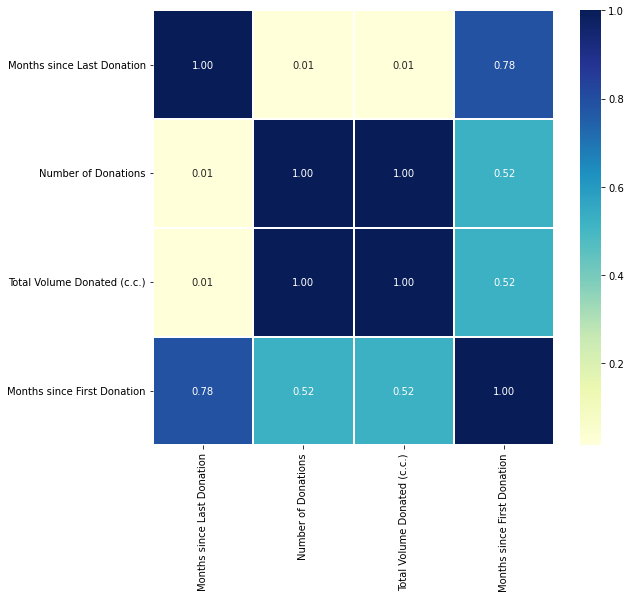

In [21]:
#visualize variable relationships
corrmat = X.corr()
f,ax = plt.subplots(figsize=(9,8))
sns.heatmap(corrmat, ax = ax, cmap = 'YlGnBu', linewidths = 0.1, fmt = '.2f', annot = True)

In [22]:
#check for unique values
unique = train['Months since Last Donation'].unique()
print(sorted(unique))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 20, 21, 22, 23, 25, 26, 35, 39, 72, 74]



# feature engineering

In [23]:
#new column to caculate number of times an individual has donated
X['Donating for'] = (X['Months since First Donation'] - X['Months since Last Donation'])

In [24]:
X.head()

Months since Last Donation  Number of Donations  \
0                           2                    2   
1                           2                    2   
2                           2                    2   
3                           2                    2   
4                           2                    2   

   Total Volume Donated (c.c.)  Months since First Donation  Donating for  
0                          500                            4             2  
1                          500                            4             2  
2                          500                            4             2  
3                          500                            4             2  
4                          500                            4             2

<AxesSubplot:>

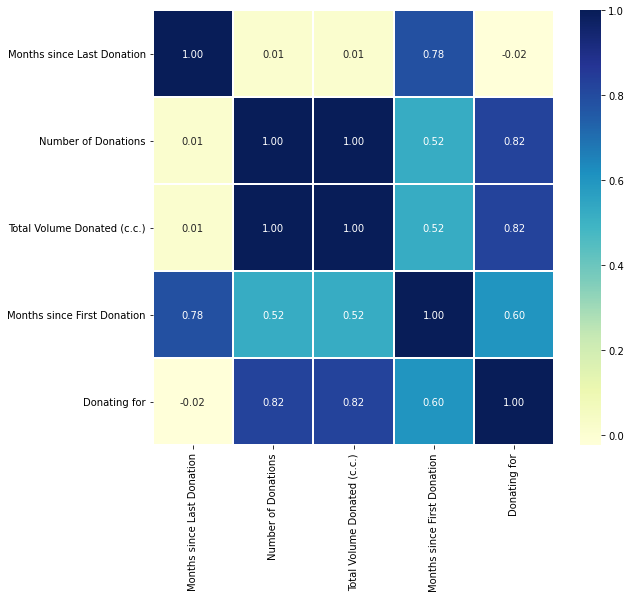

In [25]:
#check correlation between values again
corrmat = X.corr()

f, ax = plt.subplots(figsize=(9,8))
sns.heatmap(corrmat, ax=ax, cmap='YlGnBu', linewidths=0.1, fmt='.2f', annot=True)

In [26]:
#drop irreleavant column with poor correlation
X.drop(['Total Volume Donated (c.c.)'], axis=1, inplace=True)

In [27]:
print(X.head())
print(X.shape)

   Months since Last Donation  Number of Donations  \
0                           2                    2   
1                           2                    2   
2                           2                    2   
3                           2                    2   
4                           2                    2   

   Months since First Donation  Donating for  
0                            4             2  
1                            4             2  
2                            4             2  
3                            4             2  
4                            4             2  
(810, 4)


# Feature Transformation

In [28]:
#feature scaling
scale = StandardScaler()

#fit and transfomr
X = scale.fit_transform(X)

In [29]:
train = X[:576]

train.shape

(576, 4)

In [30]:
test = X[576:]

In [31]:
Y = Y[:576]
Y.shape

(576,)

# Build the model

create object, tune hyperparameters, it the model, predict the test set, review scores of each model and choose best model

In [32]:
#split the data to trian and test in 80-20 ratio
xtrain, xtest, ytrain, ytest = train_test_split(train, Y, test_size=0.2, random_state=0)

In [33]:
#Build the model

#Using Logistic regression
logreg = LogisticRegression(random_state=7)

#fit the model
logreg.fit(xtrain, ytrain)

LogisticRegression(random_state=7)

In [34]:
#predict on test data
pred = logreg.predict(xtest)

In [35]:
roc_auc_score(pred, ytest)

0.7321428571428571

In [36]:
accuracy_score(pred,ytest)

0.7155172413793104

In [37]:
#Using svc classififer
SVMC = SVC(probability=True)

SVMC.fit(train,Y)

SVC(probability=True)

In [38]:
pred = SVMC.predict(xtest)

In [39]:
accuracy_score(pred,ytest)

0.7844827586206896

In [40]:
confusion_matrix(pred,ytest)

array([[80, 24],
       [ 1, 11]], dtype=int64)

In [41]:
roc_auc_score(pred,ytest)

0.8429487179487177

In [42]:
#Using rndom forest
RFC = RandomForestClassifier()

RFC.fit(xtrain,ytrain)

RandomForestClassifier()

In [43]:
pred = RFC.predict(xtest)

In [44]:
print(confusion_matrix(pred,ytest))
print()
print(accuracy_score(pred,ytest))
print()
print(roc_auc_score(pred,ytest))

[[79 25]
 [ 2 10]]

0.7672413793103449

0.796474358974359


In [45]:
#Using Decision tree
decisiontree = DecisionTreeClassifier(max_leaf_nodes=4,max_features=3,max_depth=15)

In [46]:
decisiontree.fit(xtrain,ytrain)

DecisionTreeClassifier(max_depth=15, max_features=3, max_leaf_nodes=4)

In [47]:
pred = decisiontree.predict(xtest)

In [48]:
accuracy_score(pred,ytest)

0.7327586206896551

In [49]:
confusion_matrix(pred,ytest)

array([[80, 30],
       [ 1,  5]], dtype=int64)

In [50]:
roc_auc_score(pred,ytest)

0.7803030303030304

In [51]:
#Using Multilayer Perceptron Classifier aka mlp

In [52]:
clf_neural = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(25,), random_state=1)

In [53]:
clf_neural.fit(train,Y)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(25,), random_state=1,
              solver='lbfgs')

In [54]:
predicted = clf_neural.predict(xtest)

In [55]:
confusion_matrix(predicted,ytest)

array([[80, 24],
       [ 1, 11]], dtype=int64)

In [56]:
roc_auc_score(predicted,ytest)

0.8429487179487177

In [57]:
accuracy_score(predicted,ytest)

0.7844827586206896